In [1]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.metrics import accuracy_score

In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
### the training data (features_train, labels_train) have both: "fast" and "slow"
### points mixed together--separating them, so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


In [3]:
dt = DecisionTreeClassifier(max_depth=2,min_samples_leaf=30, min_samples_split=30) 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
clf.fit(features_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [4]:
# Accuracy
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
acc


0.92400000000000004

In [5]:
try:
    print('Picture...')
    prettyPicture(clf, features_test, labels_test)
except NameError:
    print('Passing')
    pass

Picture...


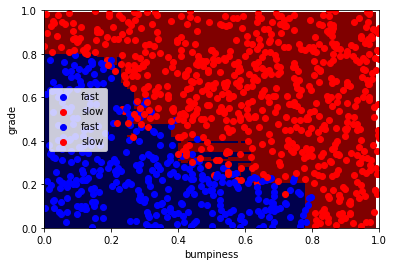

In [6]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################